<a href="https://colab.research.google.com/github/zakaria-bourouba/data_analysis/blob/main/cars_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
!pip install prince
import prince
data= pd.read_csv('Car_sales.csv')
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
data.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [5]:
data['Manufacturer'].value_counts()

Manufacturer
Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

In [6]:
data['Vehicle_type'].value_counts()

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

In [7]:
data['Model'].value_counts()

Model
Neon          2
Integra       1
Cutlass       1
Sentra        1
Altima        1
             ..
Windstar      1
Expedition    1
Ranger        1
F-Series      1
S80           1
Name: count, Length: 156, dtype: int64

In [8]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [9]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [10]:
# Calcul de la médiane de 'Price_in_thousands' pour chaque 'Manufacturer'
median_price_by_manufacturer = data.groupby('Manufacturer')['Price_in_thousands'].transform('median')

# Remplacement des valeurs manquantes dans 'Price_in_thousands' par la médiane du groupe correspondant
data['Price_in_thousands'].fillna(median_price_by_manufacturer, inplace=True)

# Si après cette opération, il reste encore des valeurs manquantes dans 'Price_in_thousands' (peut-être parce que certains groupes avaient toutes leurs valeurs manquantes),
# vous pouvez choisir de les remplacer par la médiane globale ou une autre statistique de votre choix :
global_median_price = data['Price_in_thousands'].median()
data['Price_in_thousands'].fillna(global_median_price, inplace=True)

# Vérifiez s'il reste des valeurs manquantes
print(data['Price_in_thousands'].isnull().sum())


0


In [11]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      0
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Configuration de l'IterativeImputer avec un RandomForestRegressor pour estimer les valeurs manquantes
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)

# Sélection des colonnes numériques pour l'imputation
numerical_data = data.select_dtypes(include=[np.number])

# Application de l'imputation
imputed_data = imputer.fit_transform(numerical_data)

# Création d'un DataFrame avec les données imputées pour remplacer les valeurs dans car_sales_data
imputed_data_df = pd.DataFrame(imputed_data, columns=numerical_data.columns)

# Mise à jour de car_sales_data avec les valeurs imputées pour '__year_resale_value'
data['__year_resale_value'] = imputed_data_df['__year_resale_value']

# Vérification des résultats
print(imputed_data_df.head())


   Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0              16.919               16.360               21.50          1.8   
1              39.384               19.875               28.40          3.2   
2              14.114               18.225               28.40          3.2   
3               8.588               29.725               42.00          3.5   
4              20.397               22.255               23.99          1.8   

   Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
0       140.0      101.2   67.3   172.4        2.639           13.2   
1       225.0      108.1   70.3   192.9        3.517           17.2   
2       225.0      106.9   70.6   192.0        3.470           17.2   
3       210.0      114.6   71.4   196.6        3.850           18.0   
4       150.0      102.6   68.2   178.0        2.998           16.4   

   Fuel_efficiency  Power_perf_factor  
0             28.0          58.280150  
1             25.0

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [13]:
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64

In [14]:
# Création de l'objet IterativeImputer
# Nous utilisons RandomForestRegressor comme estimateur pour les imputations, car il peut capturer des relations non linéaires et des interactions entre caractéristiques
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)

# Sélection des colonnes numériques pour l'imputation
# Note: IterativeImputer fonctionne avec des données numériques, donc si vous avez des variables catégorielles avec des valeurs manquantes,
# vous devrez les gérer séparément, par exemple en utilisant l'encodage avant l'imputation ou en appliquant d'autres méthodes d'imputation pour les catégorielles
numerical_data = data.select_dtypes(include=[np.number])

# Application de l'imputation multiple
imputed_data = imputer.fit_transform(numerical_data)

# Création d'un DataFrame avec les données imputées
imputed_data_df = pd.DataFrame(imputed_data, columns=numerical_data.columns)

# Mise à jour du DataFrame original avec les données imputées
for col in numerical_data.columns:
    data[col] = imputed_data_df[col]

# Vérification rapide pour s'assurer qu'il n'y a plus de valeurs manquantes dans les colonnes numériques
missing_values_after_imputation = data.select_dtypes(include=[np.number]).isnull().sum()

missing_values_after_imputation


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Sales_in_thousands     0
__year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

In [15]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.36000,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.87500,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.22500,Passenger,28.40,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,93.036190
3,Acura,RL,8.588,29.72500,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.25500,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,19.55815,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,20.48015,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,21.10545,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,37.40370,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


<ipython-input-16-8e0ec67eaaa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, i], bins=25)


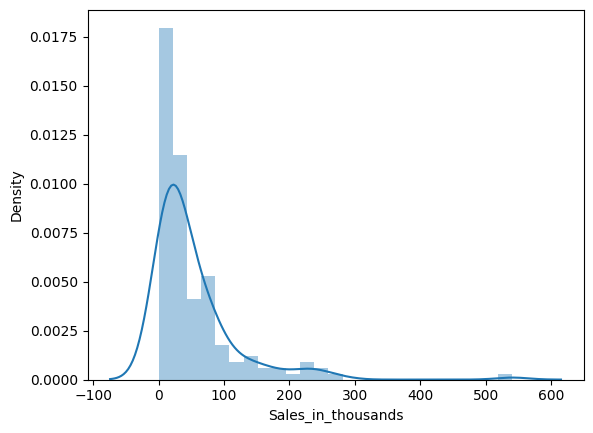

<ipython-input-16-8e0ec67eaaa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, i], bins=25)


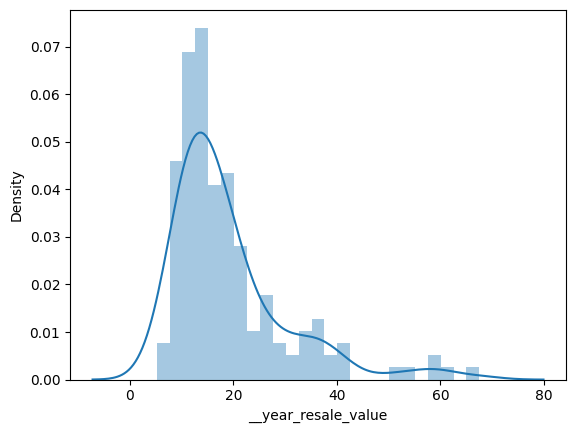

<ipython-input-16-8e0ec67eaaa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, i], bins=25)


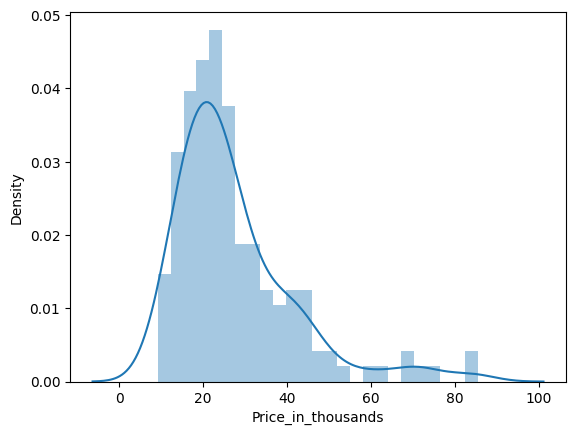

<ipython-input-16-8e0ec67eaaa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, i], bins=25)


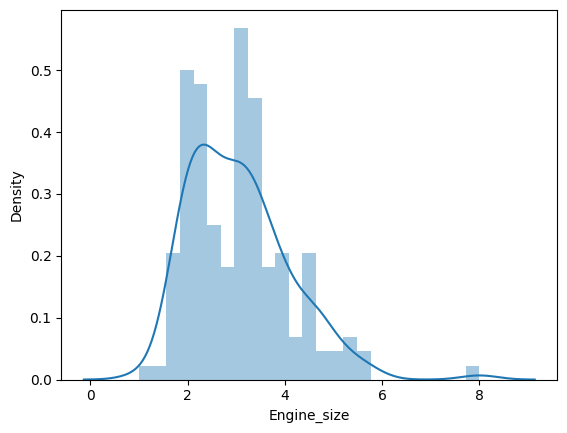

<ipython-input-16-8e0ec67eaaa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, i], bins=25)


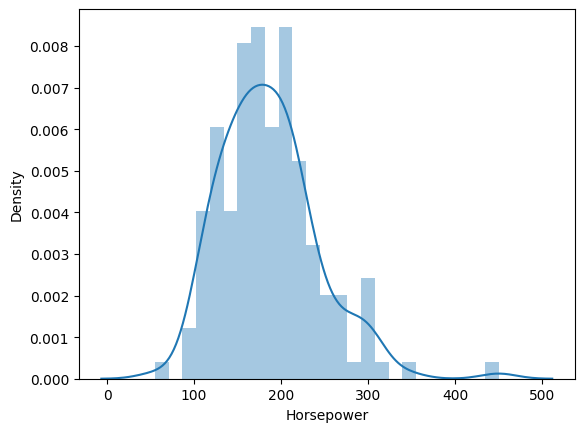

<ipython-input-16-8e0ec67eaaa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, i], bins=25)


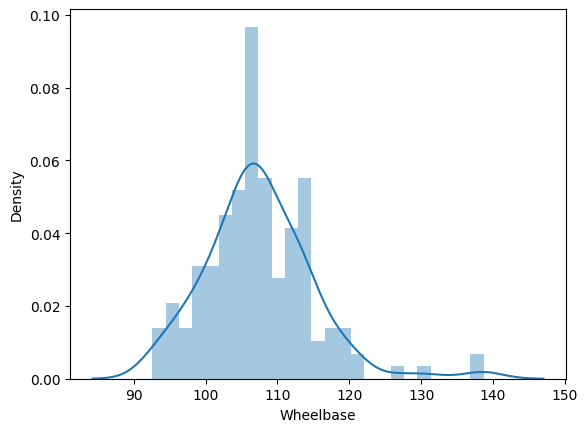

<ipython-input-16-8e0ec67eaaa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, i], bins=25)


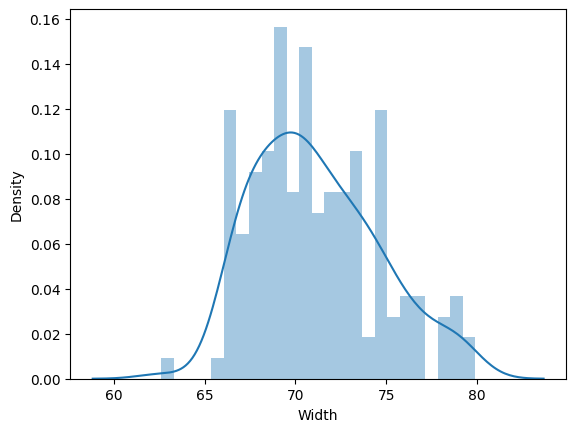

<ipython-input-16-8e0ec67eaaa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, i], bins=25)


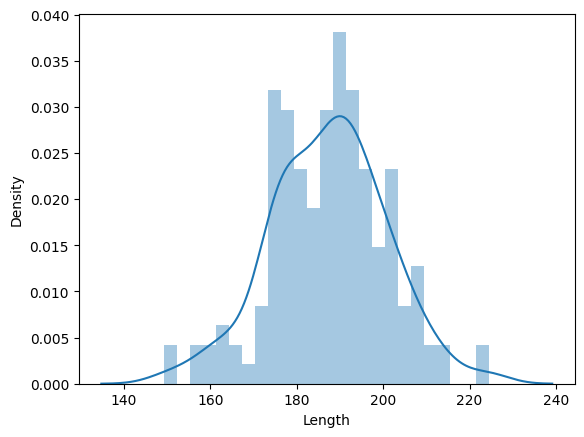

<ipython-input-16-8e0ec67eaaa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, i], bins=25)


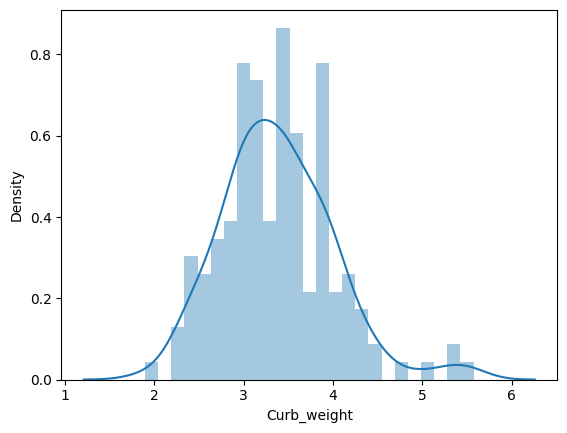

<ipython-input-16-8e0ec67eaaa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, i], bins=25)


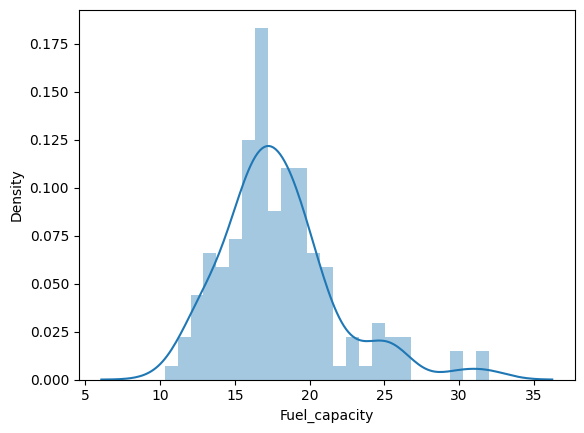

<ipython-input-16-8e0ec67eaaa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, i], bins=25)


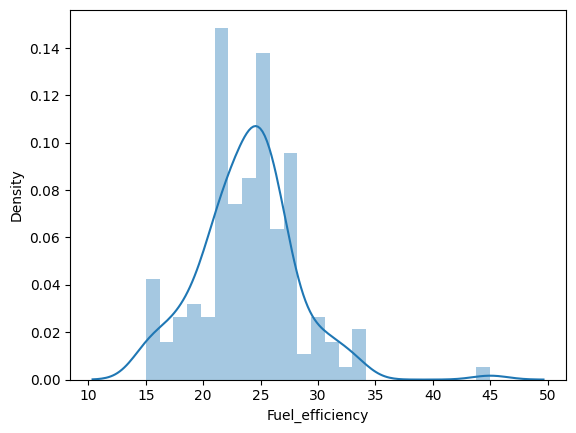

<ipython-input-16-8e0ec67eaaa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, i], bins=25)


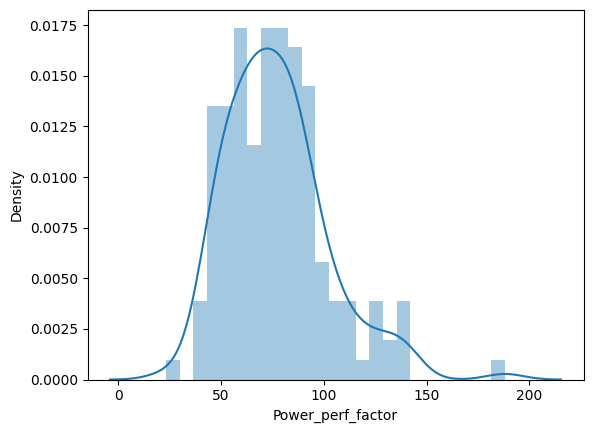

In [16]:
for i in data:
    if not (data[i].dtypes== 'object'):
        sns.distplot(data.loc[:, i], bins=25)
        plt.show()

In [17]:
data['Horsepower'].value_counts()

Horsepower
150.0    9
170.0    9
200.0    8
210.0    7
115.0    6
        ..
227.0    1
290.0    1
113.0    1
154.0    1
201.0    1
Name: count, Length: 67, dtype: int64

<ipython-input-18-056f583d9f9b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


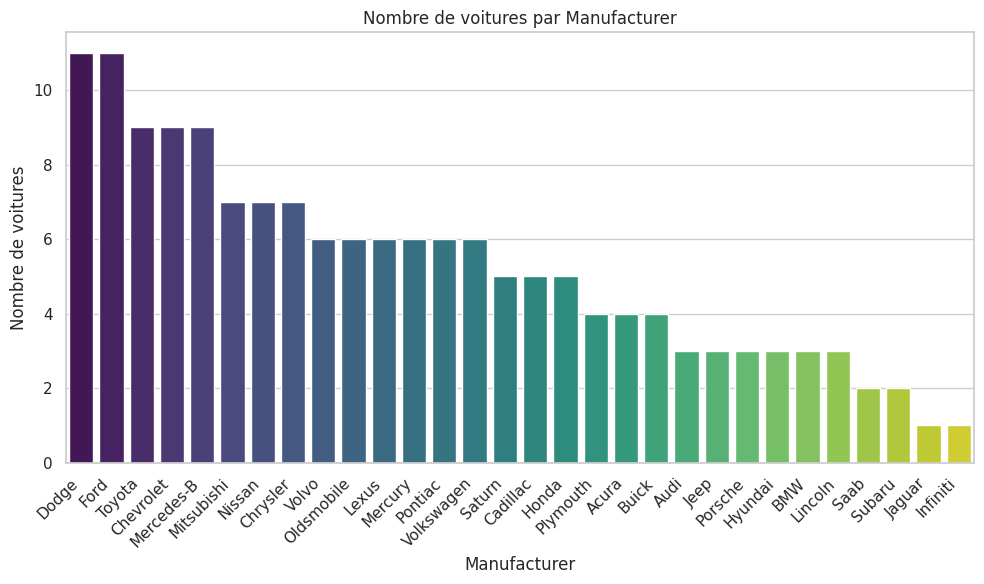

<ipython-input-18-056f583d9f9b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


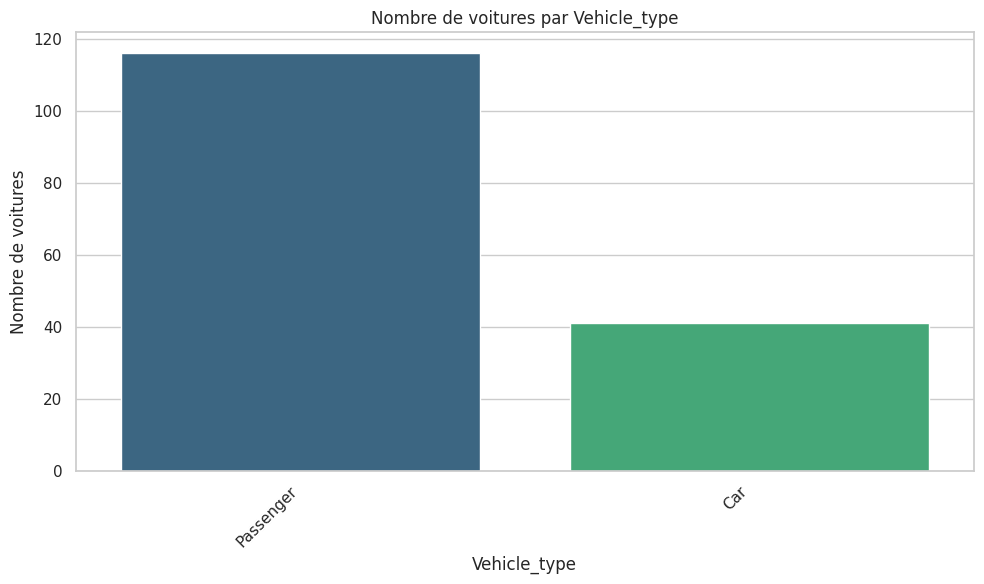

In [18]:
sns.set(style="whitegrid")
columns_to_visualize = ['Manufacturer', 'Vehicle_type']

for col in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    value_counts = data[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    plt.title(f'Nombre de voitures par {col}')
    plt.ylabel('Nombre de voitures')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

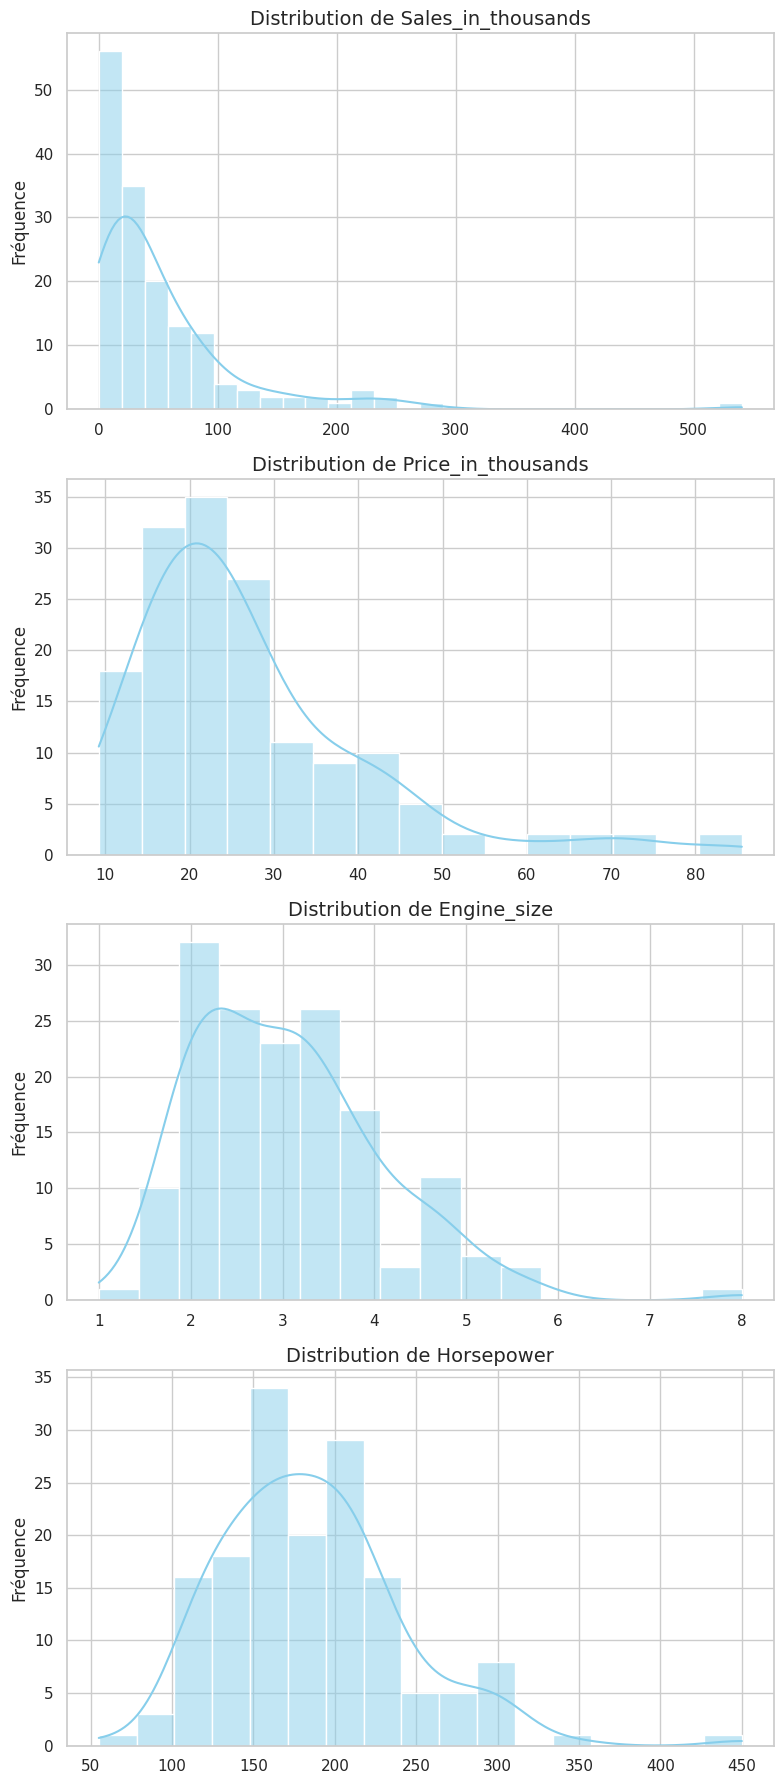

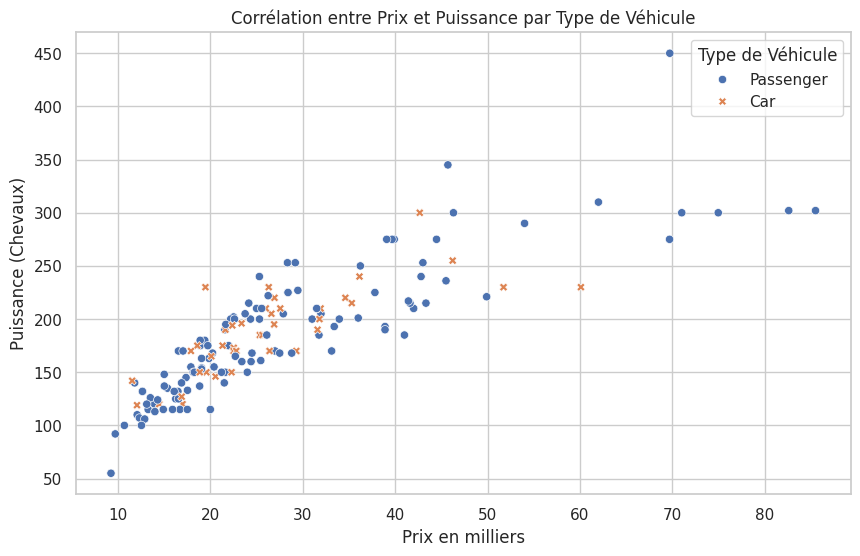

In [19]:
numerical_features = ['Sales_in_thousands', 'Price_in_thousands', 'Engine_size', 'Horsepower']

fig, axes = plt.subplots(len(numerical_features), 1, figsize=(8, 18))

for i, col in enumerate(numerical_features):
    sns.histplot(data[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution de {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price_in_thousands', y='Horsepower', hue='Vehicle_type', style='Vehicle_type', palette="deep")
plt.title('Corrélation entre Prix et Puissance par Type de Véhicule')
plt.xlabel('Prix en milliers')
plt.ylabel('Puissance (Chevaux)')
plt.legend(title='Type de Véhicule')
plt.grid(True)
plt.show()


# Bivariate Processing

In [20]:
Price_car = data['Price_in_thousands']
Horsepower= data['Horsepower']
cc= Price_car.corr(Horsepower)
print(cc)

0.8381342648084783


<ipython-input-21-d654c0efd391>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


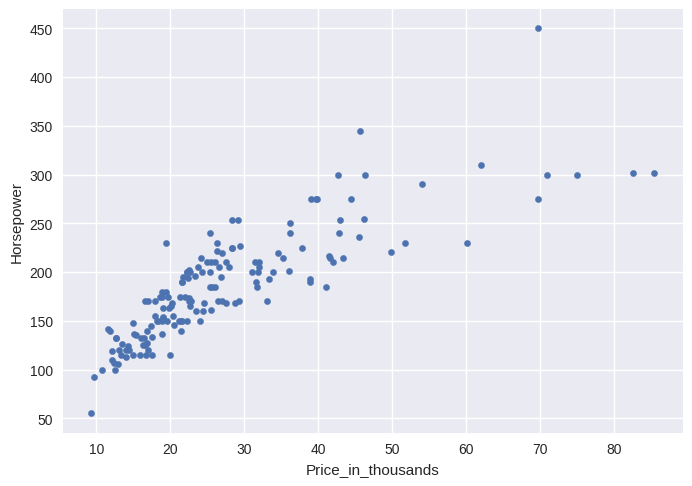

In [21]:
plt.style.use('seaborn')

data.plot(x="Price_in_thousands", y="Horsepower", kind='scatter')
plt.show()

In [22]:
Price_car= np.array(data['Price_in_thousands']).reshape(-1,1)
Horsepower= np.array(data['Horsepower']).reshape(-1,1)
model = LinearRegression().fit(Price_car, Horsepower)
r_sq= model.score(Price_car,Horsepower)
print(model.intercept_)
print(model.coef_)
print(r_sq)

[95.09898246]
[[3.32145926]]
0.7024690458460489


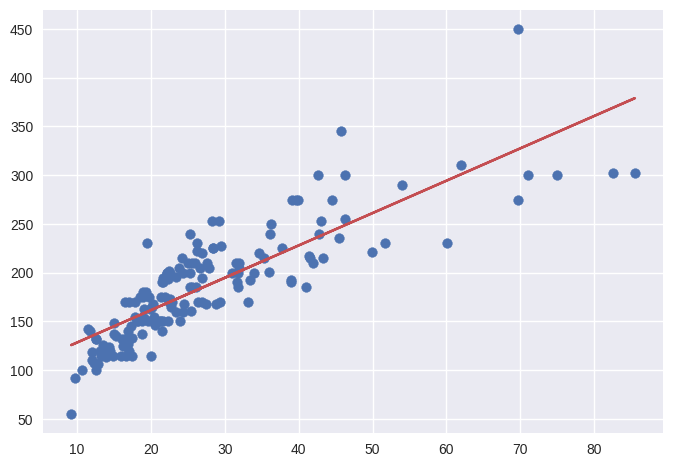

In [23]:
x=data.loc[:,"Price_in_thousands"].values
y=data.loc[:,"Horsepower"].values
y=y.reshape(-1,1)
plt.scatter(x, y)
plt.plot(x, 	95.10870489 + 	3.32133443*x, 'r', )
plt.show()

In [24]:
Price_car = data['Price_in_thousands']
Power_car= data['Power_perf_factor']
cc= Price_car.corr(Power_car)
print(cc)

0.8965406140394069


<ipython-input-25-fd779f89d61d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


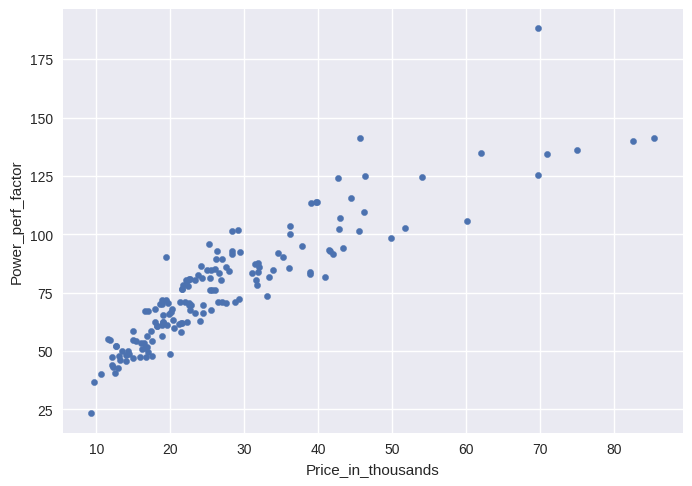

In [25]:
plt.style.use('seaborn')

data.plot(x="Price_in_thousands", y="Power_perf_factor", kind='scatter')
plt.show()

In [26]:
Price_car= np.array(data['Price_in_thousands']).reshape(-1,1)
Power_car= np.array(data['Power_perf_factor']).reshape(-1,1)
model = LinearRegression().fit(Price_car, Power_car)
r_sq= model.score(Price_car,Power_car)
print(model.intercept_)
print(model.coef_)
print(r_sq)

[34.12884833]
[[1.57235805]]
0.8037850726221558


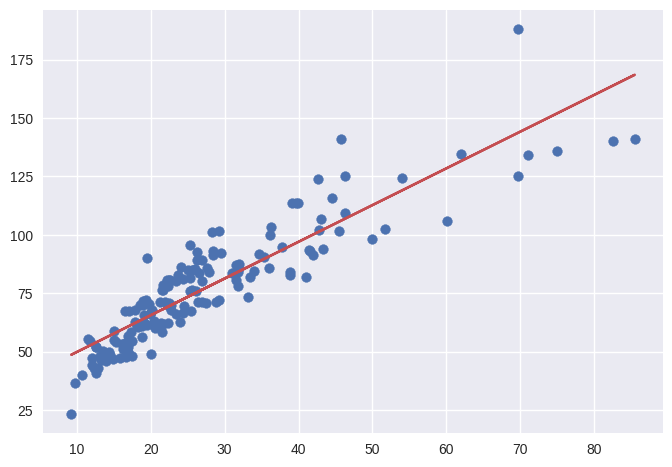

In [27]:
x=data.loc[:,"Price_in_thousands"].values
y=data.loc[:,"Power_perf_factor"].values
y=y.reshape(-1,1)
plt.scatter(x, y)
plt.plot(x, 	34.12444266 + 	1.57238531*x, 'r', )
plt.show()

# Multivariate Processing


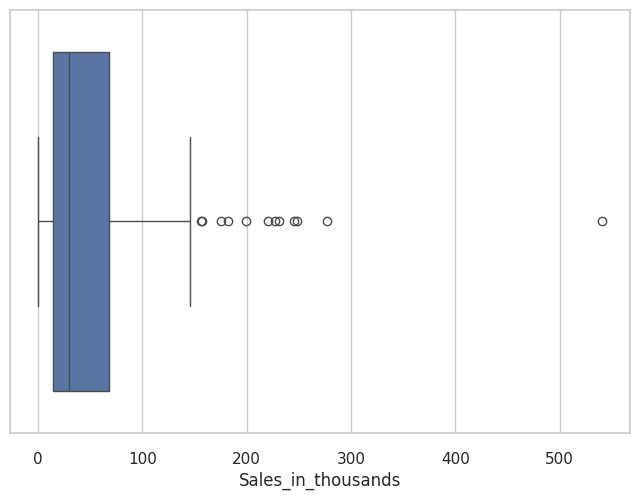

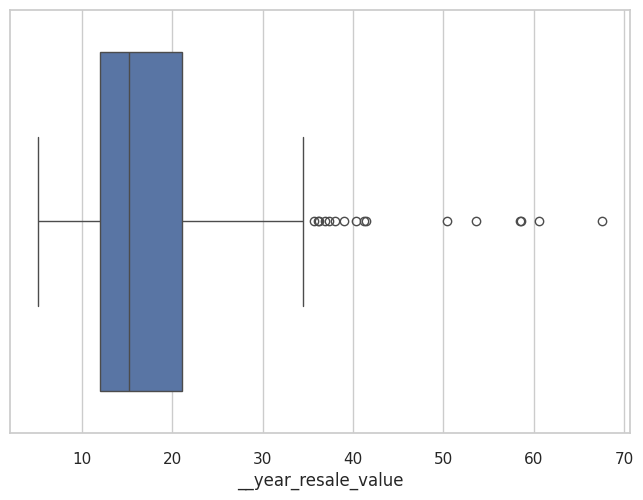

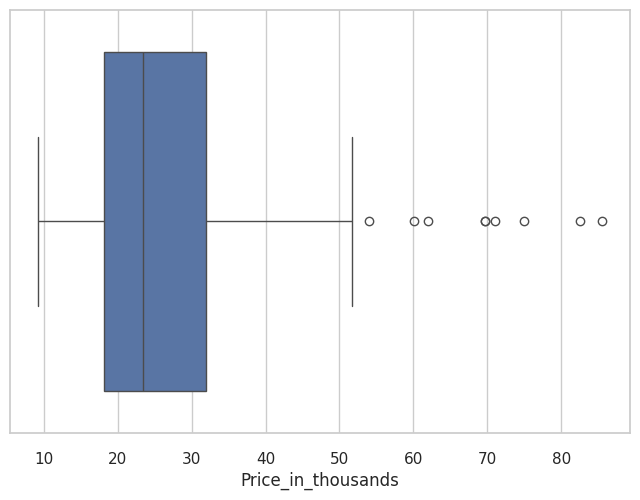

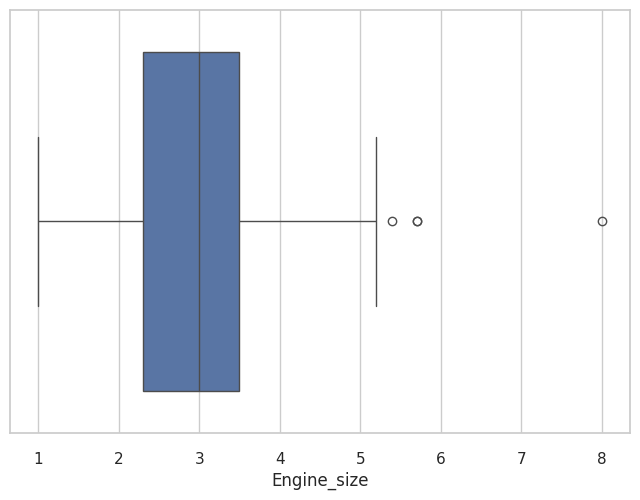

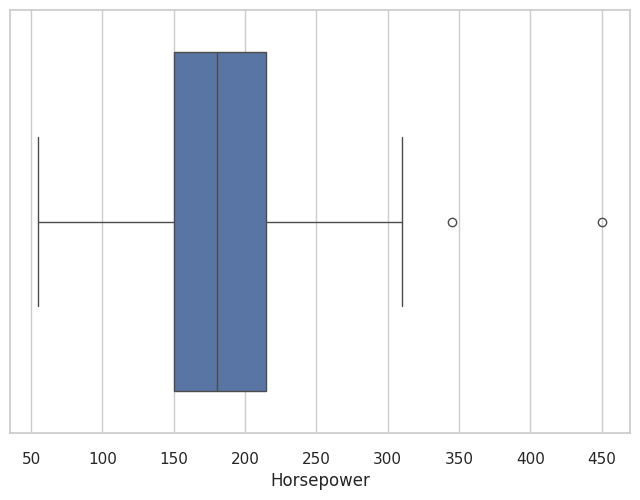

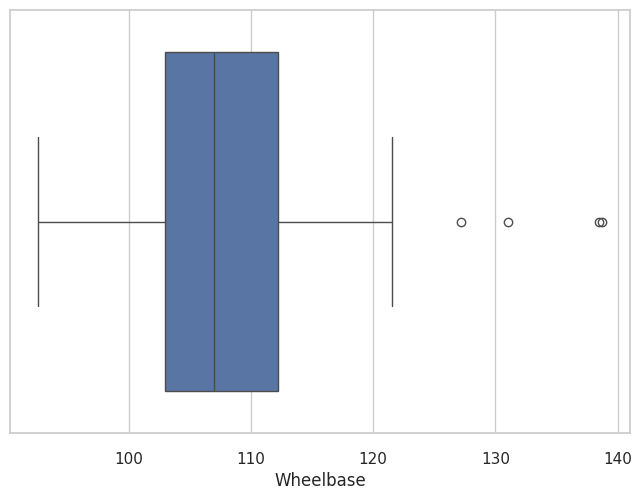

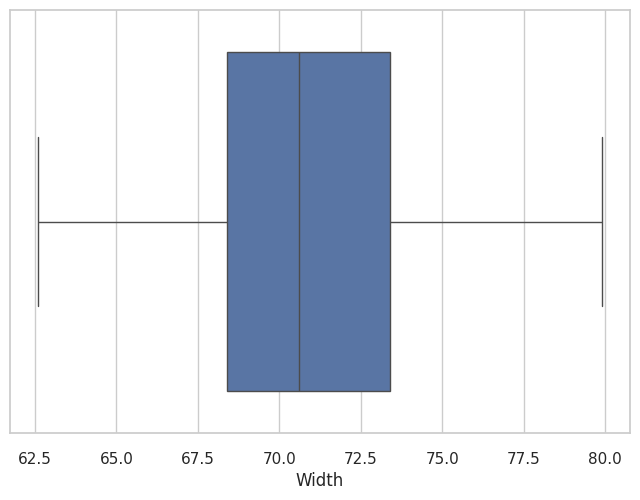

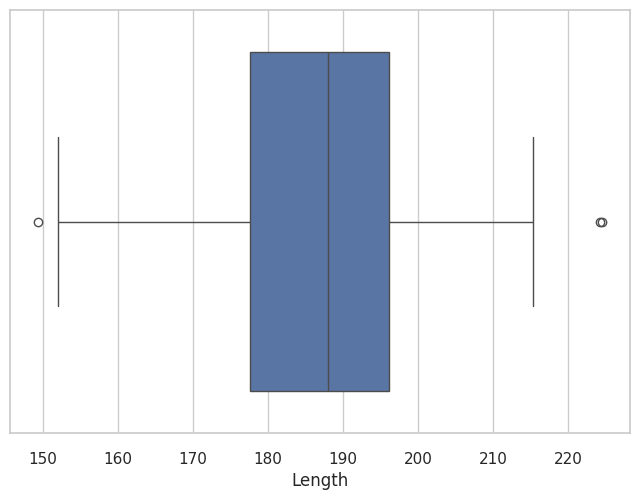

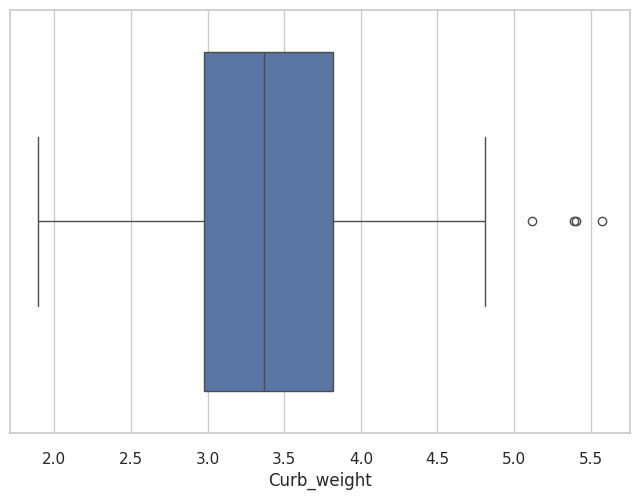

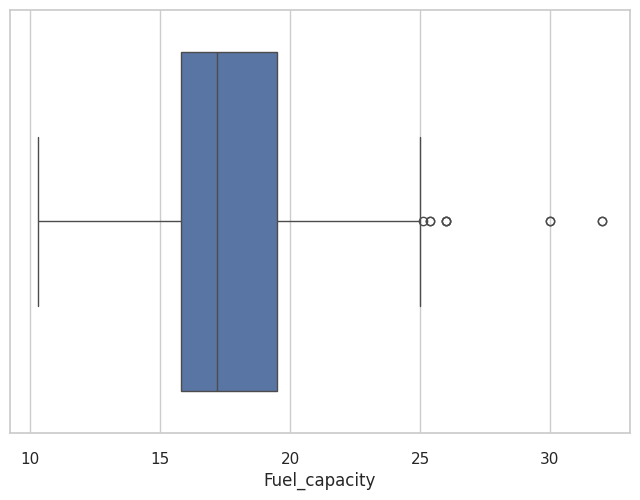

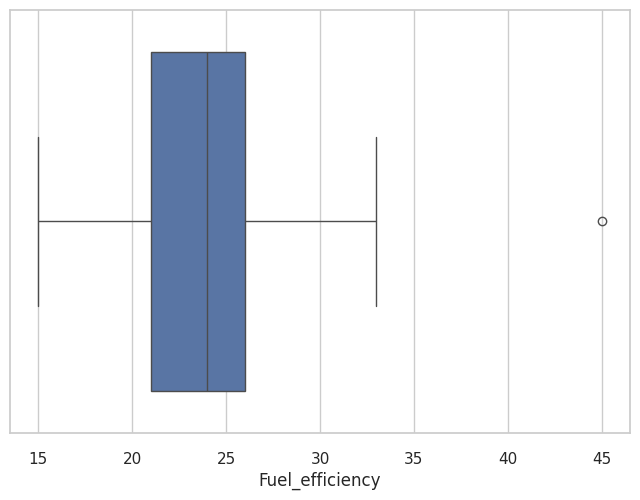

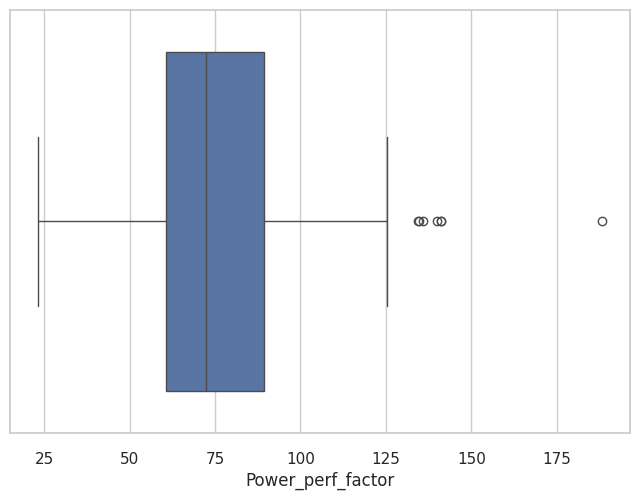

In [28]:
for i in data:
  if not(data[i].dtypes== 'object'):

    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(x=data[i])
    plt.show()

In [29]:
variables_quantitatives = data.select_dtypes(include=[np.number]).columns.tolist()

print(variables_quantitatives)

['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']


In [30]:
data[variables_quantitatives]=StandardScaler().fit_transform(data[variables_quantitatives])
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,-0.532042,-0.243531,Passenger,-0.412976,-1.214992,-0.816641,-0.827935,-1.121689,-1.121053,-1.186508,-1.230161,0.975137,2/2/2012,-0.757431
1,Acura,TL,-0.200761,0.067155,Passenger,0.072334,0.133779,0.691958,0.080858,-0.247047,0.414707,0.216901,-0.194718,0.266390,6/3/2011,0.569639
2,Acura,CL,-0.573406,-0.078687,Passenger,0.072334,0.133779,0.691958,-0.077193,-0.159582,0.347284,0.141775,-0.194718,0.502639,1/4/2012,0.636429
3,Acura,RL,-0.654896,0.937783,Passenger,1.028888,0.422801,0.425735,0.936967,0.073656,0.691893,0.749173,0.012371,-0.442358,3/10/2011,0.570401
4,Audi,A4,-0.480754,0.277520,Passenger,-0.237842,-1.214992,-0.639159,-0.643543,-0.859296,-0.701528,-0.612677,-0.401806,0.738888,10/8/2011,-0.577063


In [31]:
# Sélectionnez uniquement les colonnes numériques avant de calculer la corrélation
data_quant = data.select_dtypes(include=[np.number])
data_quant.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.332328,-0.304603,0.019985,-0.197728,0.358177,0.140906,0.254943,0.005937,0.086540,-0.015699,-0.225051
__year_resale_value,-0.332328,1.000000,0.952419,0.494451,0.762783,-0.025361,0.191958,-0.007208,0.373617,0.323246,-0.402994,0.824457
Price_in_thousands,-0.304603,0.952419,1.000000,0.626662,0.838134,0.110487,0.329149,0.156523,0.528476,0.423007,-0.492481,0.896541
Engine_size,0.019985,0.494451,0.626662,1.000000,0.837314,0.472122,0.690335,0.541377,0.760508,0.663021,-0.733093,0.817945
Horsepower,-0.197728,0.762783,0.838134,0.837314,1.000000,0.286254,0.538943,0.393525,0.611811,0.499870,-0.607692,0.992998
Wheelbase,0.358177,-0.025361,0.110487,0.472122,0.286254,1.000000,0.683119,0.839445,0.652019,0.654041,-0.494027,0.258161
Width,0.140906,0.191958,0.329149,0.690335,0.538943,0.683119,1.000000,0.710083,0.722078,0.656262,-0.594579,0.510510
Length,0.254943,-0.007208,0.156523,0.541377,0.393525,0.839445,0.710083,1.000000,0.628844,0.563452,-0.438200,0.355036
Curb_weight,0.005937,0.373617,0.528476,0.760508,0.611811,0.652019,0.722078,0.628844,1.000000,0.862992,-0.816599,0.613533
Fuel_capacity,0.086540,0.323246,0.423007,0.663021,0.499870,0.654041,0.656262,0.563452,0.862992,1.000000,-0.801049,0.499657


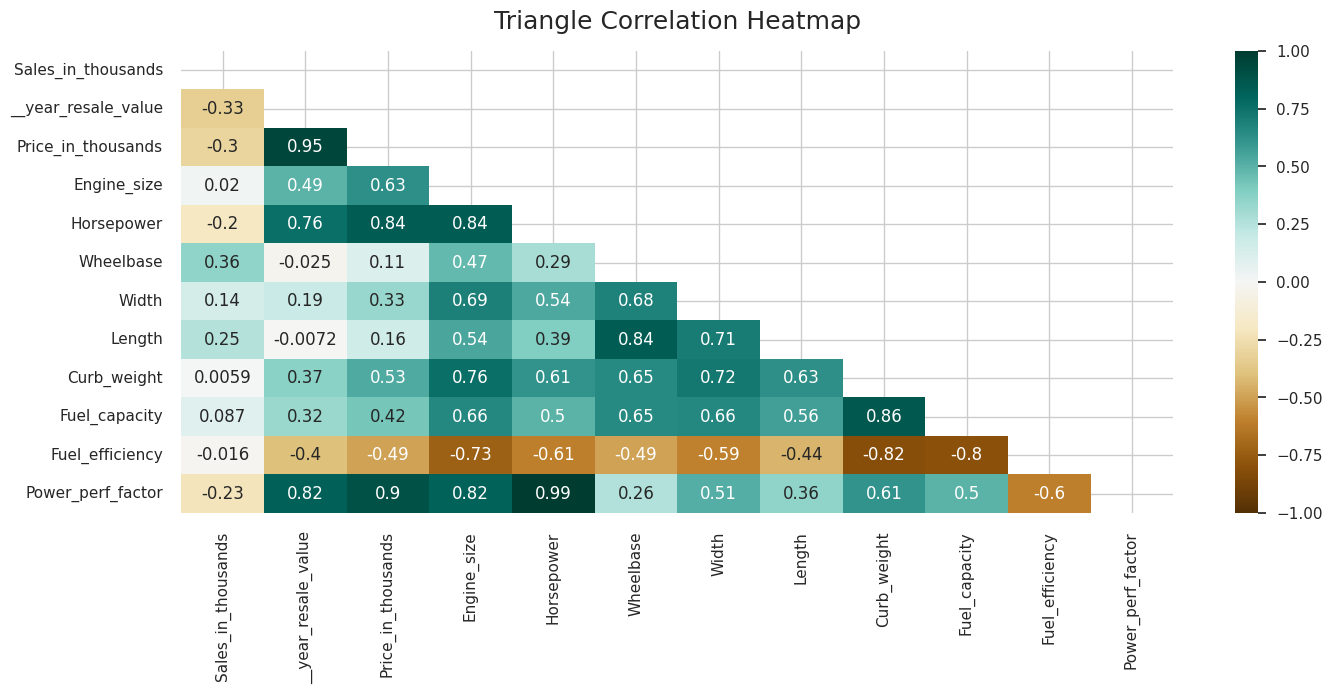

In [32]:
plt.figure(figsize=(16, 6))
# Définition du masque pour mettre les valeurs dans le triangle supérieur à True
mask = np.triu(np.ones_like(data_quant.corr(), dtype=bool))
heatmap = sns.heatmap(data_quant.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [33]:
datacov=data_quant.cov()
datacov

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.006410,-0.334458,-0.306556,0.020113,-0.198996,0.360473,0.141810,0.256577,0.005975,0.087095,-0.015799,-0.226494
__year_resale_value,-0.334458,1.006410,0.958524,0.497620,0.767672,-0.025524,0.193189,-0.007254,0.376012,0.325318,-0.405578,0.829742
Price_in_thousands,-0.306556,0.958524,1.006410,0.630679,0.843507,0.111195,0.331259,0.157527,0.531863,0.425718,-0.495638,0.902288
Engine_size,0.020113,0.497620,0.630679,1.006410,0.842681,0.475149,0.694760,0.544847,0.765383,0.667272,-0.737793,0.823188
Horsepower,-0.198996,0.767672,0.843507,0.842681,1.006410,0.288089,0.542398,0.396047,0.615733,0.503074,-0.611588,0.999364
Wheelbase,0.360473,-0.025524,0.111195,0.475149,0.288089,1.006410,0.687498,0.844826,0.656198,0.658234,-0.497194,0.259816
Width,0.141810,0.193189,0.331259,0.694760,0.542398,0.687498,1.006410,0.714634,0.726707,0.660469,-0.598390,0.513783
Length,0.256577,-0.007254,0.157527,0.544847,0.396047,0.844826,0.714634,1.006410,0.632875,0.567063,-0.441009,0.357311
Curb_weight,0.005975,0.376012,0.531863,0.765383,0.615733,0.656198,0.726707,0.632875,1.006410,0.868524,-0.821833,0.617466
Fuel_capacity,0.087095,0.325318,0.425718,0.667272,0.503074,0.658234,0.660469,0.567063,0.868524,1.006410,-0.806184,0.502860


#PCA

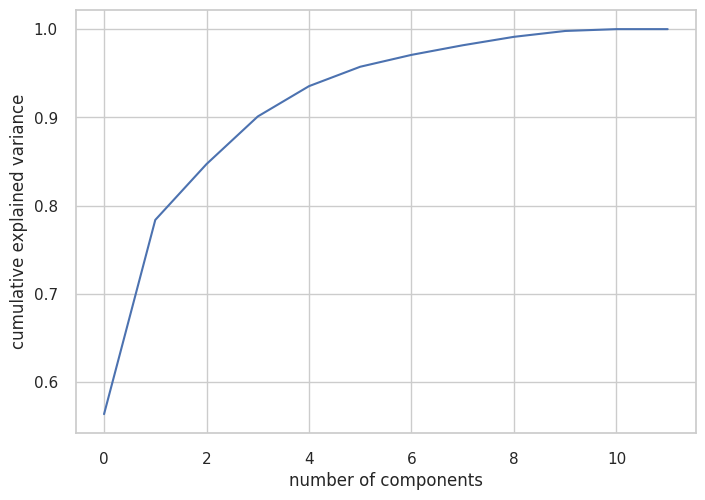

In [34]:
pca = PCA(n_components=5)
pca = PCA()
pca.fit(data[variables_quantitatives])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As we can see in the previous line chart, 2 components cover about 85% of data, which is why I'm going to proceed with 2.

In [35]:
pca = PCA(n_components=2)
principal_components=pca.fit_transform(data[variables_quantitatives])
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, data[['Manufacturer']]], axis = 1)
finalDf

,principal component 1,principal component 2,Manufacturer
0,3.013517,-1.020953,Acura
1,-0.484739,-0.339887,Acura
2,-0.349017,-0.536998,Acura
3,-1.820688,-0.493100,Acura
4,1.967253,-0.843501,Audi
...,...,...,...
152,1.887497,-1.109557,Volvo
153,0.824448,-0.494272,Volvo
154,0.745328,-0.523901,Volvo
155,-1.284844,-1.968186,Volvo


In [36]:
pca = PCA(n_components=2)
principal_components=pca.fit_transform(data[variables_quantitatives])
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, data[['Vehicle_type']]], axis = 1)
finalDf

,principal component 1,principal component 2,Vehicle_type
0,3.013517,-1.020953,Passenger
1,-0.484739,-0.339887,Passenger
2,-0.349017,-0.536998,Passenger
3,-1.820688,-0.493100,Passenger
4,1.967253,-0.843501,Passenger
...,...,...,...
152,1.887497,-1.109557,Passenger
153,0.824448,-0.494272,Passenger
154,0.745328,-0.523901,Passenger
155,-1.284844,-1.968186,Passenger


In [37]:
pca = PCA(n_components=2)
principal_components=pca.fit_transform(data[variables_quantitatives])
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, data[['Model']]], axis = 1)
finalDf

,principal component 1,principal component 2,Model
0,3.013517,-1.020953,Integra
1,-0.484739,-0.339887,TL
2,-0.349017,-0.536998,CL
3,-1.820688,-0.493100,RL
4,1.967253,-0.843501,A4
...,...,...,...
152,1.887497,-1.109557,V40
153,0.824448,-0.494272,S70
154,0.745328,-0.523901,V70
155,-1.284844,-1.968186,C70


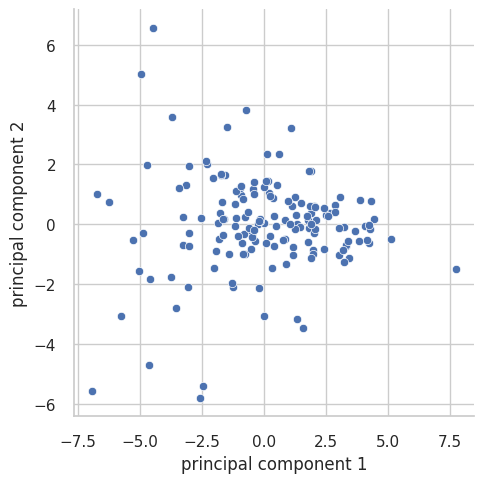

In [38]:
sns.relplot(x='principal component 1', y='principal component 2', data=finalDf);

In [39]:
import plotly.express as px

In [40]:
pca = PCA()
components = pca.fit_transform(data[variables_quantitatives])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=data["Manufacturer"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [41]:
pca = PCA()
components = pca.fit_transform(data[variables_quantitatives])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=data["Price_in_thousands"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

#Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

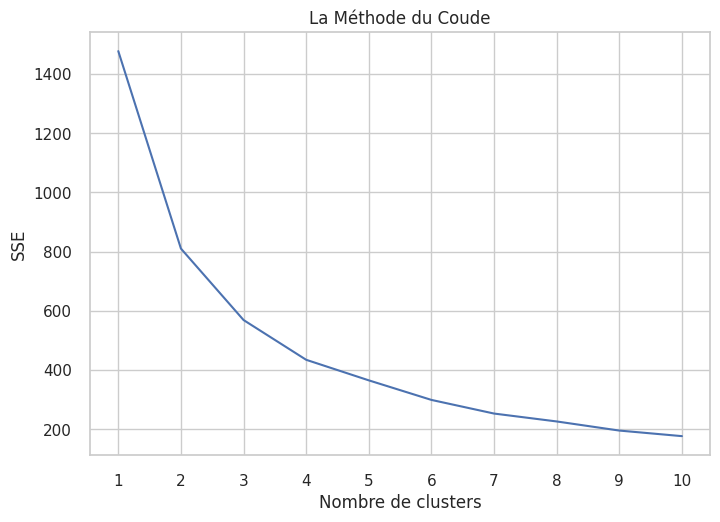

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [48]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    sse.append(kmeans.inertia_)


plt.figure()
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.title('La Méthode du Coude')
plt.show()

optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(principal_components)

n_components = 2
final_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
final_df['Cluster'] = clusters




In [49]:
final_df

,PC1,PC2,Cluster
0,3.013517,-1.020953,0
1,-0.484739,-0.339887,1
2,-0.349017,-0.536998,1
3,-1.820688,-0.493100,1
4,1.967253,-0.843501,0
...,...,...,...
152,1.887497,-1.109557,0
153,0.824448,-0.494272,0
154,0.745328,-0.523901,0
155,-1.284844,-1.968186,1


In [50]:
# Remplacez `data` par votre DataFrame original et `variables_quantitatives` par les noms des colonnes quantitatives.
for cluster in sorted(final_df['Cluster'].unique()):
    print(f"Cluster {cluster} characteristics:")
    cluster_data = data[final_df['Cluster'] == cluster]

    # Statistiques descriptives pour les variables quantitatives
    stats = cluster_data[variables_quantitatives].describe().transpose()
    print(stats)

    # Résumé pour les variables catégorielles
    for col in data.select_dtypes(include=['object', 'category']).columns:
        print(cluster_data[col].value_counts())

    print("\n")


Cluster 0 characteristics:
                     count      mean       std       min       25%       50%  \
Sales_in_thousands    66.0 -0.029977  0.807632 -0.779917 -0.566616 -0.298523   
__year_resale_value   66.0 -0.438002  0.621815 -1.233484 -0.822256 -0.613082   
Price_in_thousands    66.0 -0.578628  0.490922 -1.275632 -0.917101 -0.699344   
Engine_size           66.0 -0.834008  0.386633 -1.985718 -1.022310 -0.925970   
Horsepower            66.0 -0.776573  0.500587 -2.325240 -1.153857 -0.798893   
Wheelbase             66.0 -0.667490  0.543134 -1.894779 -1.114403 -0.564517   
Width                 66.0 -0.782875  0.559887 -2.491962 -1.165421 -0.830142   
Length                66.0 -0.713901  0.742985 -2.844102 -0.995570 -0.735240   
Curb_weight           66.0 -0.848855  0.503273 -2.375730 -1.202093 -0.734956   
Fuel_capacity         66.0 -0.740287  0.497355 -1.980857 -1.197803 -0.712439   
Fuel_efficiency       66.0  0.710252  0.895079 -1.623603  0.266390  0.502639   
Power_perf_fa

In [58]:
variables_independantes = data.drop(['Price_in_thousands'], axis=1)
variables_independantes = pd.get_dummies(variables_independantes, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(variables_independantes, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Obtention des coefficients
print(model.coef_)


[-4.68030071e-02  6.66386924e-01  6.58962890e-02 -2.63486755e-01
  3.36226512e-02 -6.42320737e-03 -1.29503084e-02  1.89674534e-01
 -4.69927715e-02  2.93317244e-02  4.51866806e-01  9.25348968e-02
 -6.50075435e-02  4.84297483e-02  6.32564973e-02 -2.81143745e-03
 -5.21617419e-02 -1.03203806e-01  1.09753623e-01 -5.14346807e-02
  1.05444870e-02 -7.90076440e-05  1.84194249e-02  1.53568220e-02
 -1.47542780e-02  1.12133692e-01  1.19146123e-01 -9.39154984e-02
  5.19203823e-02  5.97559048e-02 -4.00128134e-03  3.58831961e-02
 -3.92339149e-02 -9.11097895e-02 -1.54206398e-02 -3.79844924e-02
  2.87562369e-02 -4.09465892e-02 -7.37779355e-02 -1.80870961e-02
 -6.61755369e-02  6.49473189e-03  1.58160757e-03 -6.93555894e-02
 -9.02264956e-02 -1.41719381e-02 -6.83740022e-04 -1.52017844e-01
 -7.54827744e-03  2.51683799e-01  3.75109167e-02 -6.76024099e-03
  4.63936647e-02  7.56236940e-02  9.65353138e-04 -1.28243252e-04
  6.46514025e-02 -2.96043956e-04 -1.59935036e-02 -9.08672685e-02
  2.43492477e-02 -2.11333

In [55]:
print(variables_independantes.dtypes)


Sales_in_thousands         float64
__year_resale_value        float64
Engine_size                float64
Horsepower                 float64
Wheelbase                  float64
                            ...   
Latest_Launch_9/22/2012       bool
Latest_Launch_9/25/2011       bool
Latest_Launch_9/26/2011       bool
Latest_Launch_9/28/2011       bool
Latest_Launch_9/3/2011        bool
Length: 325, dtype: object


In [62]:
# Supposons que 'X_train.columns' est votre liste de noms de caractéristiques et 'model.coef_' vos coefficients
feature_names = ['Intercept'] + list(X_train.columns)
coefficients = [model.intercept_] + list(model.coef_)

# Créer un DataFrame pour les coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Trier le DataFrame par l'importance absolue des coefficients pour une meilleure visualisation
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df_sorted = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients_df_sorted)

                      Feature  Coefficient  Abs_Coefficient
2         __year_resale_value     0.666387         0.666387
66                Model_CL500     0.627256         0.627256
11          Power_perf_factor     0.451867         0.451867
260   Latest_Launch_4/11/2011     0.369041         0.369041
127               Model_LX470     0.344153         0.344153
..                        ...          ...              ...
224  Latest_Launch_11/26/2012     0.000000         0.000000
301    Latest_Launch_7/8/2011     0.000000         0.000000
268   Latest_Launch_4/29/2011     0.000000         0.000000
220  Latest_Launch_11/17/2011     0.000000         0.000000
291    Latest_Launch_6/6/2012     0.000000         0.000000

[326 rows x 3 columns]


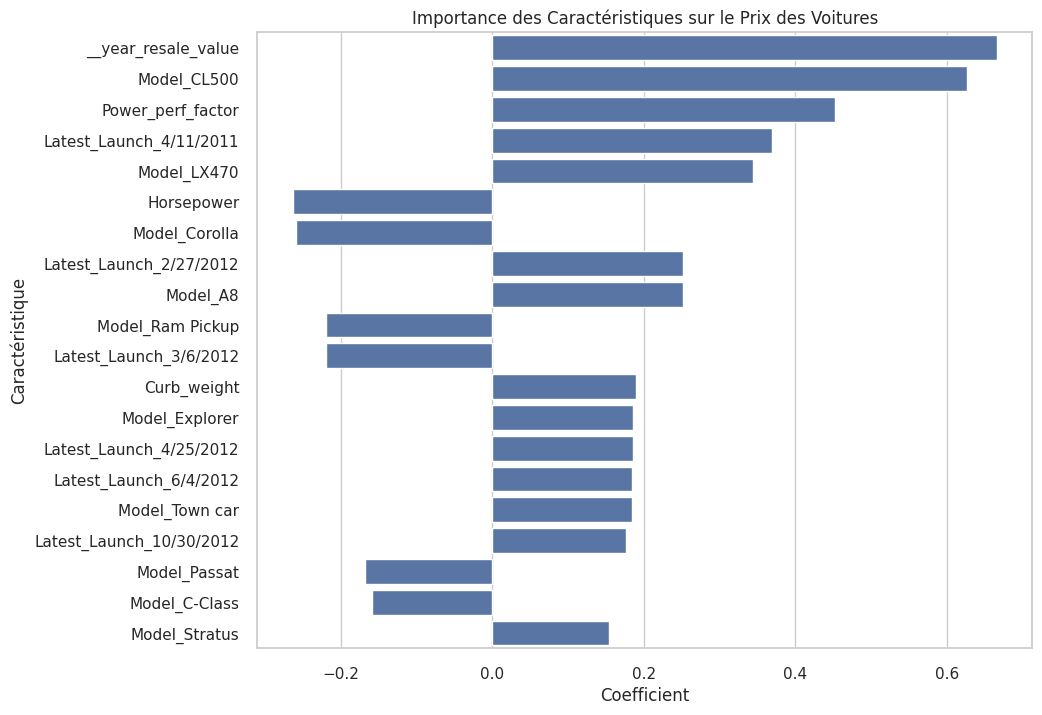

In [70]:
top_features = coefficients_df_sorted.head(20)

# Création du graphique avec une meilleure lisibilité
plt.figure(figsize=(10, 8))  # Ajuster la taille si nécessaire
sns.barplot(x='Coefficient', y='Feature', data=top_features)
plt.title('Importance des Caractéristiques sur le Prix des Voitures')
plt.xlabel('Coefficient')
plt.ylabel('Caractéristique')
plt.show()